## Initial Cleaning of Scraped Data

In this notebook, I will clean the scraped data and perform some basic Exploratory Data Analysis to understand the dataset. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import string
puncs = string.punctuation

### Overview of the dataset

In [2]:
# Read in csv
df = pd.read_csv('pubmedscrape_full.csv', index_col='Unnamed: 0')

In [3]:
# Take a look at the raw data
df.head()

,article_id,title,publication_type,abstract,journal_title,citation,n_authors,affiliations,n_affiliations,n_citations,keywords,n_references
0,31662153,Stem cell therapy for neurological disorders -...,Review,\n\n \n Neurological disease encompa...,South African medical journal = Suid-Afrikaans...,2019 Sep 10;109(8b):70-77.,4,"['Department of Pathology and Immunology, Facu...",1,5,"['Cell', 'Humans', 'Nervous System Diseases / ...",NaN
1,30053745,Neural stem cell therapy-Brief review - PubMed,Review,\n\n \n Adult mammalian neural stem ...,Clinical neurology and neurosurgery,2018 Oct;173:8-14.,3,"['Department of Anatomy, Medical University of...",3,13,"['Animals', 'Cell Differentiation / physiology...",NaN
2,30121644,Stem Cell Therapy in Heart Diseases - Cell Typ...,Review,\n\n \n A large number of clinical t...,Cellular physiology and biochemistry : interna...,2018;48(6):2607-2655.,3,['Reference and Translation Center for Cardiac...,6,35,"['Embryonic Stem Cells / cytology', 'Embryonic...",NaN
3,28543595,Stem Cell Therapy: A New Therapeutic Option fo...,Review,\n\n \n Cardiovascular diseases are ...,Journal of cellular biochemistry,2018 Jan;119(1):95-104.,7,"['Department of Medical Biotechnology, School ...",7,27,"['Cardiovascular Diseases / etiology', 'Cardio...",NaN
4,30039439,Stem Cell Therapy for Multiple Sclerosis - PubMed,Review,\n\n \n Multiple sclerosis (MS) is a...,Advances in experimental medicine and biology,2019;1084:145-174.,4,['Department of Molecular Biology and Genetics...,5,8,"['Animals', 'Humans', 'Multiple Sclerosis* / t...",NaN


In [4]:
# Understand shape of dataframe
df.shape

(9926, 12)

In [5]:
# What info does each column hold?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9925
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_id        9926 non-null   int64 
 1   title             9926 non-null   object
 2   publication_type  9807 non-null   object
 3   abstract          8892 non-null   object
 4   journal_title     9926 non-null   object
 5   citation          9926 non-null   object
 6   n_authors         9926 non-null   int64 
 7   affiliations      9926 non-null   object
 8   n_affiliations    9926 non-null   int64 
 9   n_citations       8001 non-null   object
 10  keywords          9926 non-null   object
 11  n_references      2968 non-null   object
dtypes: int64(3), object(9)
memory usage: 1008.1+ KB


In [6]:
# Duplicates
print("Number of duplicated rows =", df.duplicated().sum())
df[df.duplicated()]

Number of duplicated rows = 5


,article_id,title,publication_type,abstract,journal_title,citation,n_authors,affiliations,n_affiliations,n_citations,keywords,n_references
7384,31215778,Application of Stem Cell Technologies to Regen...,Review,"\n\n \n In the recent decades, cardi...",Cellular physiology and biochemistry : interna...,2019;53(1):101-120.,6,"['Institute of Neurophysiology, University of ...",12,3,"['Adult Germline Stem Cells / cytology*', 'Adu...",NaN
7801,28241890,p53 switches off pluripotency on differentiati...,Review,"\n\n \n The role of p53 as ""a guardi...",Stem cell research & therapy,2017 Feb 28;8(1):44.,2,"['Stem Cell Research Center, College of Bee Sc...",3,13,"['Animals', 'Cell Differentiation', 'Cell', 'E...",\n Show all 50 references\n
7802,29087220,Allogeneic stem cell transplantation as a risk...,Case Reports,NaN,Leukemia & lymphoma,2018 Jul;59(7):1750-1752.,4,"['a Department of Clinical Haematology , Austi...",4,NaN,"['Biopsy', 'Combined Modality Therapy', 'Femal...",NaN
7803,16615881,The long journey from stem cells to medical pr...,Review.,\n\n \n There is much interest in de...,Cell,2006 Apr 7;125(1):9-11.,1,"['South Dartmouth, Massachusetts, USA.']",1,13,"['Cell', 'Cell', 'Humans', 'Regenerative Medic...",NaN
7804,24759625,Novel approaches and mechanisms in hematopoiet...,Review,\n\n \n Hematopoietic stem cell gene...,Discovery medicine,2014 Apr;17(94):207-15.,2,"[""Stem Cell and Neurotherapies, University of ...",2,2,"['Genetic Therapy*', 'Genetic Vectors', 'Hemat...",NaN


In [7]:
df[df['article_id'].isin(df[df.duplicated()]['article_id'].tolist())]['article_id']

7381    31215778
7384    31215778
7797    28241890
7798    16615881
7799    29087220
7800    24759625
7801    28241890
7802    29087220
7803    16615881
7804    24759625
Name: article_id, dtype: int64

In [8]:
# NaN values
df.isna().sum()

article_id             0
title                  0
publication_type     119
abstract            1034
journal_title          0
citation               0
n_authors              0
affiliations           0
n_affiliations         0
n_citations         1925
keywords               0
n_references        6958
dtype: int64

#### Observations and action plan:

*Shape:* 

- Dataset has 9926 rows and 12 columns. Each columns holds information about an article that a user can find in PubMed:
    - `article_id`: PubMed ID for the article
    - `title`: article's title
    - `publication_type`: the type of publication *(some missing info)*
    - `abstract`: the article's abstract *(some missing info)*
    - `journal_title`: the title of the journal the article was published in
    - `citation`: citation key with information about the publication year
    - `n_authors`: number of authors
    - `affiliations`: author affiliations (universities, company, country, etc)
    - `n_affiliations`: the number of affiliations associated with the article
    - `n_citations`: the number of times the publication was cited *(some missing info)*
    - `keywords`: keywords linked to publication by PubMed
    - `n_references`: the number of references used in the publication

*Duplicates:*

- There are 5 duplicated rows. Based on the index number, they seem to have appeared multiple times in the search results. For now I will remove these rows so they are not double counted for the purpose of understanding the topics discussed in the field of 'stem cell therapy'. 

*Null Values:*

- `n_references`: lots of NaN values, impute some kind of 'average' (no publication would be published without references)
- `publication_type`: some NaN values, can impute `Uncategorized`
- `abstract`: some NaNs, can impute `Unavailable`
- `n_citations`: fill in null with 0, assuming these articles were not cited and change type to `int64`

*Others:*

- `publication year`: to be extracted from `citation`
- `title`: one hot encode? / NLP
- `journal_title`: one hot encode? / NLP
- `affiliations`: extract affiliated country 
- `keywords`: check for empty lists in keywords
- `result_order`: location of article in the query result to be extracted from index

##### Drop Duplicates

In [9]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

##### Add result_order

In [10]:
# Add result_order
df['result_order'] = np.arange(1, len(df)+1)

##### `publication_type`

In [11]:
# Impute into null publication type
df['publication_type'] = df['publication_type'].fillna('Uncategorized')
# Remove tailing '.'
df['publication_type'] = df['publication_type'].apply(lambda x: x.rstrip('.'))
# Look at unique publication types
df['publication_type'].value_counts()

Review                         8457
Clinical Trial                  417
Editorial                       292
Case Reports                    204
Comment                         140
Comparative Study               133
Uncategorized                   119
Randomized Controlled Trial      74
Meta-Analysis                    43
Published Erratum                20
Multicenter Study                 5
Controlled Clinical Trial         5
Guideline                         4
Practice Guideline                4
Observational Study               3
Retraction of Publication         1
Name: publication_type, dtype: int64

Out of 9000+ publications there are 16 publication types. Over 90% of the publications in the query result are Reviews.

##### `pub_year` from `citation`

In [12]:
# Get publication year from citation
df['pub_year'] = df['citation'].apply(lambda x: re.findall('[1-2][0-9][0-9][0-9]', x)[0]).astype('int64')
# Drop citation
df.drop('citation', axis=1, inplace=True)

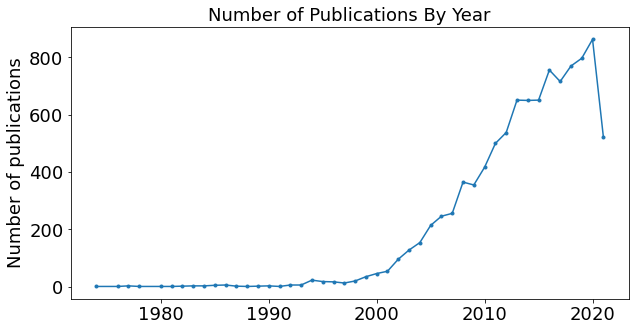

In [13]:
# Group by each year and count the number of publications
years = df.groupby('pub_year').agg('count')['title'].index
n_pubs = df.groupby('pub_year').agg('count')['title'].values

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(years, n_pubs, marker='.')
plt.xticks(fontsize=18)
plt.ylabel('Number of publications', fontsize=18)
plt.title('Number of Publications By Year', fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [14]:
# Earliest publication year in results
df['pub_year'].min()

1974

In [15]:
# Latest publication year in results
df['pub_year'].max()

2021

The query results span from 1974 to 2021. The number of publications published annually stayed quite constant from 1974 to the mid 90's. From 2000 we start to see an explosion of publications up to around 2020. This makes sense as 1999 was [a breakthrough year for stem cell research](https://www.sciencemag.org/news/1999/12/stem-cells-named-breakthrough-year). In 2006, the controversy around stem cells having to be derived from fetuses was put to rest with [Dr. Shinya Yamanaka](https://www.nobelprize.org/prizes/medicine/2012/yamanaka/facts/) discovering a way to create stem cells from adult cells (we can now scrape some skin from your cheeks and artifically turn them back into your stem cells!). This discovery fueled the stem cell research frenzy even more. There is a sharp dip in 2021, which I believe is due to this data being scraped in July, 2021. 

##### `n_references`

In [16]:
# Extract nunmber of references from non-null articles
n_ref = df[~df['n_references'].isna()]['n_references'].apply(lambda x: re.findall('[0-9]?[0-9][0-9]', x))

# Simple function to return contents of the list in n_ref
def clean_nref(x):
    if len(x) != 0:
        return x[0]
    else:
        return None

# Get index numbers of rows to edit    
idx_to_edit = df[~df['n_references'].isna()]['n_references'].index
# 
df.loc[idx_to_edit, 'n_references'] = df[~df['n_references'].isna()]['n_references'].apply(lambda x: re.findall('[0-9]?[0-9][0-9]', x)).apply(clean_nref)

In [17]:
# Proportion of rows with n_ref information
len(idx_to_edit)/df.shape[0]

0.2990625944965225

Only 30% of the articles have information about the number of references used, this value will be imputed after train/test split for any regression/classification models.

##### `keywords`

In [18]:
# Make each keyword column into clean line of words
df['keywords'] = df['keywords'].apply(lambda x: x.translate(str.maketrans(' ', ' ', puncs)).lower())
# Get the number of keywords
df['n_keywords'] = df['keywords'].apply(lambda x: len(x.split(' ')))

In [19]:
# Empty keywords still exist
df[df['keywords']==''].shape[0]/df.shape[0]

0.18143332325370426

About 18% of the rows do not have keywords associated to them. I will change the keyword count to 0 and impute 'none'.

In [20]:
# Empty [] were counted as 1
df[df['n_keywords']==1]['keywords'].unique()

array([''], dtype=object)

In [21]:
# Change the count to 0
df['n_keywords'] = np.where(df['n_keywords']==1, 0, df['n_keywords'])
# Fill empty 'keywords' with none
df['keywords'] = np.where(df['keywords']=='', 'none', df['keywords'])

##### `abstract`

In [22]:
# Take a look at a few samples
df['abstract'].sample(3).values

array(['\n\n      \n      Cell replacement and restorative therapies have great perspectives in the treatment of various diseases and traumas. Various types of stem cells, most different in the biological properties, are evaluated as the potential substrates of cell therapy for such diseases. Mesenchymal stem cells (MSC) posses relatively high proliferative activity and high level of plasticity, and can be differentiated not only to the cells of the mesenchymal lineage, but also to the neurons. Among the MSC populations, a population of endometrial stem cells, including that present in the menstrual blood, is available most readily. In the current study, we analyze biological properties of the menstrual blood stem cells and evaluate those cells as a potential substrate of cell therapy.\n    \n',
       '\n\n      \n      Stem cell therapy may rely on delivery and homing through the vascular system to reach the target tissue. An optical tweezer model has been employed to exert different

When there is an abstract, it begins with new lines and white spaces and ends with some new lines and white spaces. There are also some punctuations used throughout. I will remove these and make all the letters lower case. For publications with no abstract available, I will impute the string 'Unavailable'.

In [23]:
# Remove whitespace and new lines
df['abstract'] = df['abstract'].str.replace('\s\s+', ' ')

# Fill empty 'abstract' with unavailable
idx_to_edit = df[df['abstract'].isna()].index
df.loc[idx_to_edit, 'abstract'] = 'Unavailable'

# Remove punctuations
df['abstract'] = df['abstract'].apply(lambda x: x.translate(str.maketrans(' ', ' ', puncs)).lower())
# Remove leading ' '
df['abstract'] = df['abstract'].apply(lambda x: x.lstrip(' '))
# Get word count
df['abstract_wc'] = df['abstract'].apply(lambda x: len(x.split(' ')))

##### `title`

From the sample above I see that I need to remove the right trailing ' - PubMed' and punctuations. 

In [24]:
# Remove ' - PubMed'
df['title'] = df['title'].apply(lambda x: x.rstrip(' - PubMed'))
# Clean 'abstract'
df['title'] = df['title'].apply(lambda x: x.translate(str.maketrans('', '', puncs)).lower())
# Get title word counts
df['title_wc'] = df['title'].apply(lambda x: len(x.split(' ')))

##### `affiliations`

In [25]:
# Take a look at a sample
df['affiliations'].sample(4).values

array(["['Department of Cardiology, Internal Medical Clinic III, University of Heidelberg, Germany. thomas.dengler@urz.uni-heidelberg.de']",
       '["aDepartment of Surgery, The Second Affiliated Hospital, Xi\'an Jiaotong University bDepartment of Otolaryngology, The Fourth People\'s Hospital of Shaanxi Province cDepartment of Otolaryngology, Xijing Hospital, Fourth Military Medical University dDepartment of Otolaryngology, Shaanxi Provincial People\'s Hospital, Xi\'an, Shaanxi, People\'s Republic of China."]',
       "['Department of Urology, Peking University Third Hospital, Beijing 100191, China.', 'Department of Reproductive Medicine Center, Peking University Third Hospital, Beijing 100191, China.', 'Department of Andrology, Peking University Third Hospital, Beijing 100191, China.', 'Department of Urology, Peking University Third Hospital, Beijing 100191, China.', 'Department of Reproductive Medicine Center, Peking University Third Hospital, Beijing 100191, China.', 'Department of

The affiliations is a big block of ugly string. The simplest thing I can do is to extract the unique countries within the block of text.

In [26]:
# List of countries from https://gist.github.com/kalinchernev/486393efcca01623b18d
countries = open('countries').read().split('\n')
countries.append('USA') # lots of affiliations use USA instead of United States of America
countries.append('España') # some publications are in a foreign language

In [27]:
# Clean up affiliations
df['affiliations'] = df['affiliations'].apply(lambda x: x.translate(str.maketrans(' ', ' ', puncs)))
# Make a list of each affiliation
df['affiliations'] = df['affiliations'].str.split(' ')
# Extract name of country if it exists in the countries list
df['affiliations'] = df['affiliations'].apply(lambda x: [country for country in countries if country in x])

In [28]:
# Take a look
df['affiliations']

0       [Switzerland]
1            [Poland]
2           [Germany]
3              [Iran]
4            [Turkey]
            ...      
9921            [USA]
9922            [USA]
9923            [USA]
9924            [USA]
9925          [China]
Name: affiliations, Length: 9921, dtype: object

In [29]:
# The number of countries affiliated to the article
df['n_countries'] = df['affiliations'].apply(lambda x: len(x))

# Simple function to return contents of the list in affiliations
def clean_country(x):
    if len(x) != 0:
        return ' '.join(x)
    else:
        return None

# Create countries column to count vectorize
df['affiliations'] = df['affiliations'].apply(clean_nref)

In [30]:
# How many rows are empty?
df['affiliations'].isna().sum()/df.shape[0]

0.24937002318314686

About 25% of the countries are missing a value.

In [31]:
# Fill na with 'Unknown'
df['affiliations'].fillna('Unknown', inplace=True)

In [32]:
# Fill in null values with 1 (at least one affiliation)
df['n_affiliations'] = df['n_affiliations'].fillna(1)

In [33]:
df['affiliations'].value_counts()

Unknown       2474
USA           1681
China         1348
Japan          544
Germany        393
              ... 
Azerbaijan       1
Venezuela        1
Ethiopia         1
Kuwait           1
Estonia          1
Name: affiliations, Length: 80, dtype: int64

We could not extract the country/countries that a publication is affiliated with for 2000+ publications. From those that we could, we see that the top publishers are affiliated with the USA and China, followed by Japan and Germany. In the future, it would be great if I can make the list of countries more comprehensive.

##### `n_citations`

In [34]:
df['n_citations'].describe()

count     7997
unique     184
top          1
freq      1075
Name: n_citations, dtype: object

Not all citations that are filled are integers. I will impute the missing values with 0 assuming that the publications do not have citations, remove any punctuation and make sure the type is integer.

In [35]:
# Fill null citations with 0
df['n_citations'] = df['n_citations'].fillna(0)
# Make citations string
df['n_citations'] = df['n_citations'].astype('str')
# Remove punctuations
df['n_citations'] = df['n_citations'].apply(lambda x: x.translate(str.maketrans(' ', ' ', puncs)))
# Make sure type is integer
df['n_citations'] = df['n_citations'].astype('int64')

In [36]:
df['n_citations'].describe()

count    9921.000000
mean       12.432214
std        58.616713
min         0.000000
25%         1.000000
50%         4.000000
75%        12.000000
max      5072.000000
Name: n_citations, dtype: float64

Based on the distribution of citations, it seems less than 25% of the publications were missing the number of citations. 75% of the publications have less than 12 citations, while the upper limit for this number is 5072. 

In [37]:
# Take a look at the cleaned dataset
df.sample(10)

,article_id,title,publication_type,abstract,journal_title,n_authors,affiliations,n_affiliations,n_citations,keywords,n_references,result_order,pub_year,n_keywords,abstract_wc,title_wc,n_countries
4485,28713990,inhibition of p38mapk potentiates mesenchymal ...,Review,the present study aimed to investigate the pro...,Molecular medicine reports,4,China,4,4,animals apoptosis cardiotonic agents metaboli...,NaN,4486,2017,47,226,14,1
6822,28807014,epigenetic reprogramming converts human wharto...,Review,background lineage commitment of mesenchymal s...,Stem cell research & therapy,5,Australia,13,8,adaptor proteins animals base sequence calcium...,61,6823,2017,83,277,18,4
7933,18769371,transplantation therapy for parkinson disease ...,Editorial,unavailable,Nature clinical practice. Neurology,1,Unknown,0,1,animals humans parkinson disease pathology pa...,NaN,7929,2008,31,1,12,0
7754,30089748,therapyrelated myelodysplastic syndrome after ...,Case Reports,unavailable,Journal of clinical and experimental hematopat...,5,Japan,5,0,autografts female hematopoietic stem cell mobi...,12,7754,2018,36,1,20,1
944,28618324,stem cells an emerging novel therapeutic for t...,Review,stem cell based strategies are therapeutically...,Diabetes research and clinical practice,3,India,3,1,animals autoimmunity diabetes mellitus diabete...,NaN,945,2017,17,51,10,1
4503,26086962,neural stem cell transplantation at critical p...,Review,alzheimers disease ad is characterized by neur...,Cell death & disease,8,Unknown,8,16,alzheimer disease therapy amyloid beta animal...,48,4504,2015,50,156,20,0
4912,21547696,isolation of oct4 nanog and sox2 mesenchymal c...,Review,diabetes mellitus is a chronic metabolic disor...,Human cell,2,India,1,3,adult antigens biomarkers analysis cd13 antig...,None,4913,2011,60,228,16,1
3594,33169563,mesenchymal stem cells in the treatment of cov...,Review,at present sarscov2 is raging and novel corona...,Sheng wu gong cheng xue bao = Chinese journal ...,3,China,6,1,betacoronavirus covid clinical trials as topic...,NaN,3595,2020,23,202,10,1
919,33426232,stem cell therapy for osteonecrosis of femoral...,Review,osteonecrosis of the femoral head onfh is a pr...,Regenerative therapy,6,China,11,0,none,91,920,2020,0,239,11,1
7214,23400460,qa john dick on stem cells and cancer,Review,unavailable,Cancer discovery,1,Unknown,0,1,animals antineoplastic agents therapeutic use...,NaN,7215,2013,46,1,8,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9921 entries, 0 to 9925
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_id        9921 non-null   int64 
 1   title             9921 non-null   object
 2   publication_type  9921 non-null   object
 3   abstract          9921 non-null   object
 4   journal_title     9921 non-null   object
 5   n_authors         9921 non-null   int64 
 6   affiliations      9921 non-null   object
 7   n_affiliations    9921 non-null   int64 
 8   n_citations       9921 non-null   int64 
 9   keywords          9921 non-null   object
 10  n_references      2917 non-null   object
 11  result_order      9921 non-null   int32 
 12  pub_year          9921 non-null   int64 
 13  n_keywords        9921 non-null   int64 
 14  abstract_wc       9921 non-null   int64 
 15  title_wc          9921 non-null   int64 
 16  n_countries       9921 non-null   int64 
dtypes: int32(1), i

In [39]:
df.shape

(9921, 17)

#### Cleaned dataset description

Now we have a dataset with 9921 rows and 17 columns that have no null values (except for `n_references` which will need to be imputed later). Each text column (`title`, `abstract` and `keywords`) have punctuations stripped and everything in lower case. Quantitative measures like number of keywords, number of countries, and number of citations were added.

The influence of a paper is determined by the number of times it has been cited by other publications. It would be interesting to see if this is something we can predict from the features that we have about each publication. This would be a good way for me to further my understanding of the dataset. 

My ultimate goal here, however, is to understand what the major topics within 'stem cell therapies' are. For this, a promising metric is PubMed's keywords. Let's see how this metric has evolved over time. 

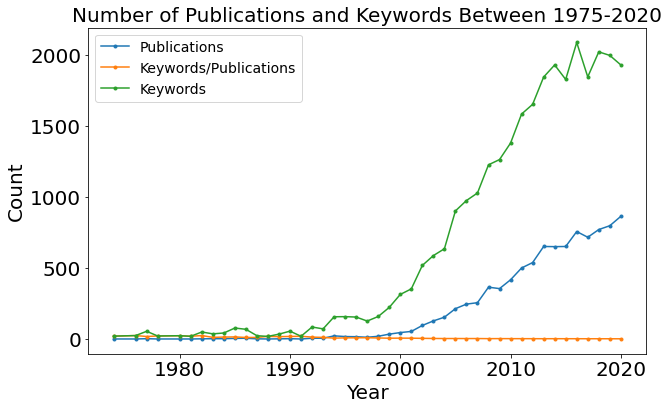

In [41]:
# Group into different years and aggregate count for the number of publications per year
n_pubs = df.groupby('pub_year').agg('count')['title'].values
pub_year = df.groupby('pub_year').agg('count')['title'].index

# Create new df for keywords by year
keywords_by_year = df.groupby('pub_year')['keywords'].agg('sum').reset_index()

# Count the number of unique keywords for each year
keywords_by_year['n_keywords'] = keywords_by_year['keywords'].apply(lambda x: len(set(x.split(' '))))
keywords_by_year['n_publications'] = n_pubs

# Plot keywords and publications over time
plt.figure(figsize=(10,6))
plt.plot(pub_year[:-1], n_pubs[:-1], marker='.', label='Publications')
plt.plot(keywords_by_year['pub_year'][:-1], keywords_by_year['n_keywords'][:-1], marker='.', label='Keywords')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Number of Publications and Keywords Between 1975-2020', fontsize=20)
plt.savefig('Timecourse_pubs_kw.png')

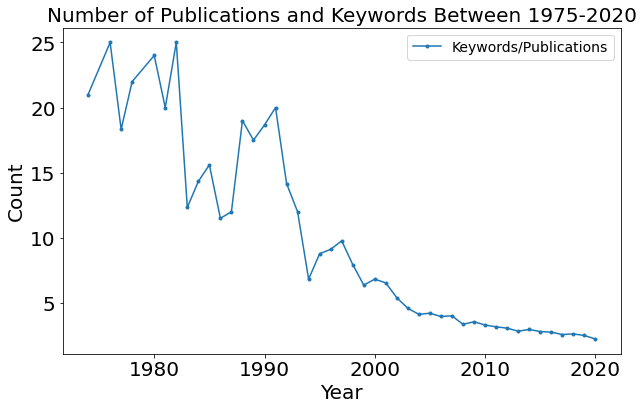

In [43]:
# Group into different years and aggregate count for the number of publications per year
n_pubs = df.groupby('pub_year').agg('count')['title'].values
pub_year = df.groupby('pub_year').agg('count')['title'].index

# Create new df for keywords by year
keywords_by_year = df.groupby('pub_year')['keywords'].agg('sum').reset_index()

# Count the number of unique keywords for each year
keywords_by_year['n_keywords'] = keywords_by_year['keywords'].apply(lambda x: len(set(x.split(' '))))
keywords_by_year['n_publications'] = n_pubs

# Plot keywords and publications over time
plt.figure(figsize=(10,6))
plt.plot(keywords_by_year['pub_year'][:-1], keywords_by_year['n_keywords'][:-1]/n_pubs[:-1], marker='.', label='Keywords/Publications')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=14)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Number of Publications and Keywords Between 1975-2020', fontsize=20)
plt.savefig('Timecourse_pubs_kw.png')

In [38]:
# Save keywords from different eras into csvs to look at later
kw_upto2005 = keywords_by_year[0:30]
kw_from2005 = keywords_by_year[30:-1]

kw_upto2005.to_csv('kw_upto2005.csv')
kw_from2005.to_csv('kw_from2005.csv')

The number of unique keywords stayed quite constant up until 1990 from where it saw a dramatic increase until 2020. Again we are seeing quite a significant decrease in number of unique keywords in 2021. This is probably attributed to the fact that the scrape occurred in 2021 July, but perhaps there's been some consolidation in the topics because of Covid-19. 

None the less, at the current time, there are about 2000 unique key words within the topic of 'stem cell therapies'. This is too many for a human like myself to sift through and understand in a short amount of time. I think it would be great if we could condense this down to somewhere between 10-100 key topics. 

In [53]:
for i in range(len(df)):
    df['keywords'].apply(lambda x: set(x.split(' ')))

0       {, randomized, controlled, therapy, cell, phys...
1       {, cytology, induced, cell, transplantation, n...
2       {, induced, humans, diseases, cell, transplant...
3       {, cytology, therapy, cell, heart, transplanta...
4       {, therapy, myelin, sheath, cell, transplantat...
                              ...                        
9921    {, lineage, therapeutic, humans, use, animals,...
9922    {, effects, therapy, leukemia, cell, transplan...
9923    {, female, middle, therapeutic, induction, tri...
9924    {, separation, ansplantation, humans, animals,...
9925    {, therapeutic, anscription, humans, use, neop...
Name: keywords, Length: 9921, dtype: object

### Summary

The raw scraped dataset contained data about 9926 publications from a search query in PubMed with the term 'stem cell therapies'. Each data point had 12 features. With data exploration, I removed duplicates, extracted information, and filled missing values and now have information about 9921 publications with 17 features. 

I will continue with the data exploration by attempting to predict a publication's influence level through classification models and move on to Topic Modeling to condense the ~2000 key words about 'stem cell therapies' into 10-100 key topics.

### Export clean dataset to csv

In [245]:
df.to_csv('pubmedscrape_full_cleaned.csv')